In [2]:
!cp drive/MyDrive/Colab\ Notebooks/train.zip .

In [3]:
!unzip -qq train.zip -d dogs-vs-cats

In [4]:
!ls -l dogs-vs-cats/

total 768
drwxr-xr-x 2 root root 782336 Sep 20  2013 train


In [5]:
import keras
from keras.preprocessing import image
from glob import glob
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [10]:
path = 'dogs-vs-cats/train/'

ROW, COL = 96, 96

In [11]:
dogs, cats = [], []
y_dogs, y_cats = [], []

In [12]:
def load_dogs():
    print('Loading all dog images\n')
    dog_path = os.path.join(path, 'dog*')
    for dog_img in glob(dog_path):
        dog = cv2.imread(dog_img)
        dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
        dog = cv2.resize(dog, (ROW, COL))
        dog = image.img_to_array(dog)
        dogs.append(dog)
    print('All dog images loaded')

In [13]:
def load_cats():
    print('Loading all cat images\n')
    cat_path = os.path.join(path, 'cat*')
    for cat_img in glob(cat_path):
        cat = cv2.imread(cat_img)
        cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
        cat = cv2.resize(cat, (ROW, COL))
        cat = image.img_to_array(cat)
        cats.append(cat)
    print('All cat images loaded')

In [14]:
load_dogs()

Loading all dog images

All dog images loaded


In [16]:
print('###########################################')

###########################################


In [17]:
load_cats()

Loading all cat images

All cat images loaded


In [18]:
print('Lenght of our dogs array: {}\nLenght of our cats array: {}'.format(len(dogs),len(cats)))

Lenght of our dogs array: 12500
Lenght of our cats array: 12500


In [19]:
classes = ['dog', 'cat']

In [20]:
import random

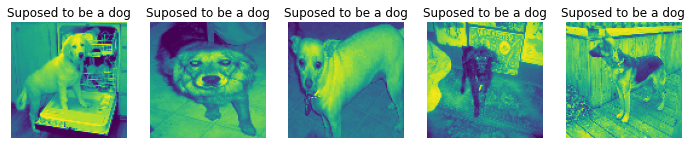

In [22]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Suposed to be a {}'.format(classes[0]))
    
plt.show()

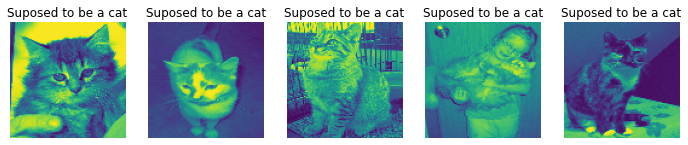

In [24]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Suposed to be a {}'.format(classes[1]))
    
plt.show()

In [25]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [26]:
print('Len of dogs labels: {}\nLen of cats labels: {}'.format(len(y_dogs), len(y_cats)))

Len of dogs labels: 12500
Len of cats labels: 12500


In [27]:
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')
dogs /= 255
cats /= 255

In [29]:
X = np.concatenate((dogs, cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [30]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 100
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [31]:
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot Encoding done')

One-Hot Encoding done


In [32]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])

In [33]:
print('The model was created by following config:')
model.summary()

The model was created by following config:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [35]:
checkpoint = ModelCheckpoint('model_checkpoint/dogs_vs_cats_redux_checkpoint.h5')

In [36]:
model.fit(X, y, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDAION_SPLIT, verbose=VERBOSE)

Epoch 1/100
157/157 - 20s - loss: 0.6765 - accuracy: 0.6247 - val_loss: 0.9312 - val_accuracy: 0.1662
Epoch 2/100
157/157 - 12s - loss: 0.5812 - accuracy: 0.6887 - val_loss: 0.6104 - val_accuracy: 0.6996
Epoch 3/100
157/157 - 12s - loss: 0.5166 - accuracy: 0.7430 - val_loss: 0.6464 - val_accuracy: 0.6514
Epoch 4/100
157/157 - 13s - loss: 0.4702 - accuracy: 0.7738 - val_loss: 0.5780 - val_accuracy: 0.7136
Epoch 5/100
157/157 - 13s - loss: 0.4348 - accuracy: 0.7955 - val_loss: 0.5490 - val_accuracy: 0.7328
Epoch 6/100
157/157 - 13s - loss: 0.3922 - accuracy: 0.8197 - val_loss: 0.7551 - val_accuracy: 0.6230
Epoch 7/100
157/157 - 13s - loss: 0.3527 - accuracy: 0.8425 - val_loss: 0.8794 - val_accuracy: 0.5964
Epoch 8/100
157/157 - 13s - loss: 0.3230 - accuracy: 0.8576 - val_loss: 0.5771 - val_accuracy: 0.7280
Epoch 9/100
157/157 - 13s - loss: 0.2774 - accuracy: 0.8812 - val_loss: 0.8414 - val_accuracy: 0.6486
Epoch 10/100
157/157 - 13s - loss: 0.2411 - accuracy: 0.8985 - val_loss: 0.5933 - 

In [38]:
scores = model.evaluate(X, y, verbose=2)
print('MODEL ACCURACY\n{}: {}'.format(model.metrics_names[1], scores[1]*100))

782/782 - 5s - loss: 0.2719 - accuracy: 0.9592
MODEL ACCURACY
accuracy: 95.91599702835083
